# Princípios da Visualização de Dados

## Capítulo 2: Cinco diretrizes para melhores visualizações de dados.

Sempre que crio uma visualização de dados é importante seguir cinco diretrizes principais.

1. Mostre os dados;
2. Reduza a desordem;
3. Integre os gráficos e o texto;
4. Evite o gráfico espaguete;
5. Comece com cinza.

Mostrar os dados e reduzir a desordem significa reduzir linhas de grade, marcadores e sombras estranhas que obscurecem os dados reais. Títulos ativos, rótulos melhores e anotações úteis integrarão seu gráfico com o texto ao redor dele. Quando os gráficos são densos com muitas séries de dados, você pode usar cores estrategicamente para destacar séries de interesse ou dividir um gráfico denso em várias versões menores.

### 2.1 Mostrar os dados

Seu leitor só pode entender seu ponto, argumento ou história se enxergar isso nos dados. Isto não significa necessariamente que todos os dados devem ser mostrados, mas significa que você deve destacar os valores que são importantes para seu argumento. Como criadores de gráficos, nosso desafio é decidir quais dados mostrar e a melhor maneira de apresenta-los.

Considere este mapa de densidade de pontos do Brasil. Ele usa dados de densidade populacional, não fica claro a fonte, e coloca um ponto para cada um dos 240 milhões de habitantes do país em seus blocos censitários. Observe como não há nada na imagem, exceto os dados. Não há fronteiras estaduais, estradas, marcadores de cidades ou rótulos para lagos e rios. Ainda o reconhecemos como Brasil porque as pessoas tendem a viver ao longo de fronteiras, margens dos grandes rios e costas, o que ajuda a dar forma ao país.

![Figura 1](Imagens/img_04.jpeg)

Isso não significa que devemos mostrar todos os dados o tempo todo. Às vezes, os gráficos mostram muitos dados, dificultando a visualização de quais pontos de dados são mais importantes. No gráfico a seguir, que utiliza dados do [Our Workd in Data](https://ourworldindata.org/grapher/mean-years-of-schooling-long-run), mostra a evolução do número médio de anos de escolaridade em 112 países ao redor do mundo.Isso o torna o gráfico poluído e confuso, impossível escolher uma tendência para qualquer país. 

In [1]:
#Anscombe Quartet
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Carregando o dataframe com os dados
dfPath = 'Data/mean-years-of-schooling-long-run.filtered/mean-years-of-schooling-long-run.csv'
df_ = pd.read_csv(dfPath)

In [3]:
# renomeando a ultima coluna dop dataframe
df_.rename(columns={df_.columns[-1]: 'Average years of schooling'}, inplace=True)

In [4]:
# Determinando quantos anos diferentes tem na coluna 'Year"
qAnos = df_['Year'].unique()
print('Anos diferentes:', qAnos)

Anos diferentes: [1995 2000 2005 2010 2015 2020]


In [5]:
qPaises = df_['Entity'].unique()
print(qPaises)

['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium' 'Belize' 'Benin'
 'Bolivia' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chile' 'China' 'Colombia'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Eswatini' 'Europe' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lesotho'
 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Macao' 'Malawi' 'Malaysia'
 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Moldova'
 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal'
 'N

In [6]:
print(len(qPaises))

147


In [7]:
# Criando um novo dataframe que tem como colunas os anos e como index os paises
df = pd.DataFrame(index=qPaises, columns=qAnos)
print(df.head())

            1995 2000 2005 2010 2015 2020
Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN
Albania      NaN  NaN  NaN  NaN  NaN  NaN
Algeria      NaN  NaN  NaN  NaN  NaN  NaN
Argentina    NaN  NaN  NaN  NaN  NaN  NaN
Armenia      NaN  NaN  NaN  NaN  NaN  NaN


In [8]:
#for pais in ['Afghanistan', 'Brazil', 'United States']:
for pais in qPaises:
    # encontrar todas as ocorrencia de um pais na coluna 'Entity'
    dfPais = df_[df_['Entity'] == pais]
    for ano in qAnos:
        try:
            valor = dfPais[dfPais['Year'] == ano].iloc[0].values[-1]
        except:
            # se nao encontrar, coloca NaN no lugar
            valor = np.nan
        df.at[pais, ano] = valor # adiciona o valor no dataframe
print(df.head())

             1995  2000   2005   2010   2015   2020
Afghanistan   2.4  3.03   3.32   3.93   4.81   5.69
Albania      8.54  9.93  10.24  10.44   9.99  10.32
Algeria      5.76  6.06   6.43    7.0   7.55   8.18
Argentina    8.91  9.08   9.57   9.71   9.59   9.86
Armenia       NaN   NaN    NaN    NaN  10.45  10.54


In [9]:
# suprimir as linhas do df que tem dados faltando (NaN)
df = df.dropna() 
print(df.head())


              1995   2000   2005   2010   2015   2020
Afghanistan    2.4   3.03   3.32   3.93   4.81   5.69
Albania       8.54   9.93  10.24  10.44   9.99  10.32
Algeria       5.76   6.06   6.43    7.0   7.55   8.18
Argentina     8.91   9.08   9.57   9.71   9.59   9.86
Australia    11.51  11.37  11.71  11.69  12.92  12.93


In [10]:
print(len(df.index))

112


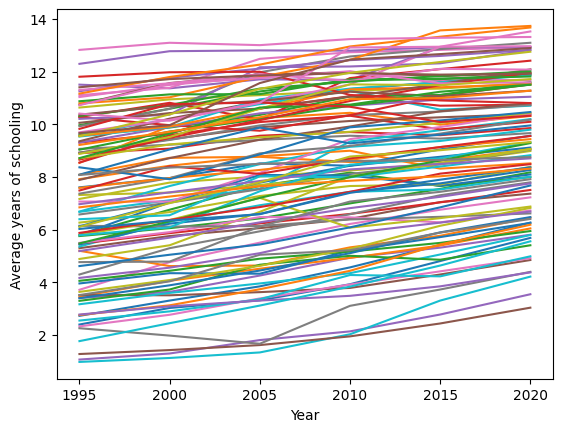

In [11]:
# fazer um gráfico de linhas com os dados do df onde x são as colunas, uma
# linha para cada pais e y é o valor da célula. Não colocar as legendas
ax = df.T.plot()
#tirar as legendas
plt.legend().remove()
ax.set_ylabel('Average years of schooling')
ax.set_xlabel('Year')
plt.show();



No gráfico à direita, apenas seis países de interesse são destacados, enquanto os restantes são definidos em cinza, misturando-os em um fundo neutro. Isso dá ao leitor uma visão clara dos países que queremos destacar. Não se trata de mostrar a menor quantidade de dados, mas sim de mostrar os dados que mais importam.

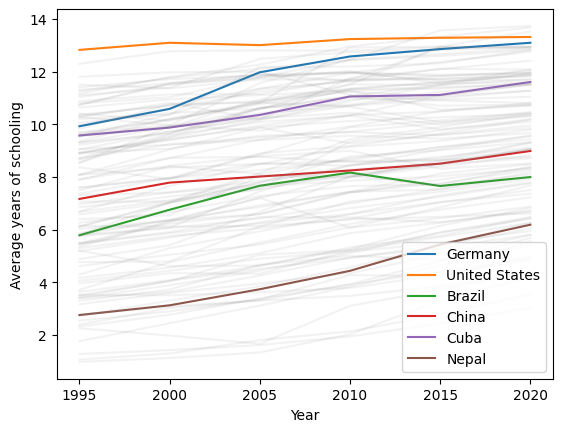

In [12]:
select = ['Germany', 'United States', 'Brazil', 'China', 'Cuba', 'Nepal']
ax = df.loc[select].T.plot()
ax.legend(bbox_to_anchor=(1.31, 1), loc='upper right')
ax.set_ylabel('Average years of schooling')
ax.set_xlabel('Year')
# plotar agora todos os paises que não estão na lista select na mesma cor
df.loc[pd.Index(df.index).difference(select)].T.plot(ax=ax, legend=False, color='gray', alpha=0.1)
plt.show();

### 2.2 Reduzir a desordem

O uso de elementos visuais desnecessários distrai o leitor dos dados importantes e desorganiza a página. Há muitos tipos diferentes de formas de criar desordem nos gráficos que podemos querer evitar. Há elementos básicos como linhas de grade, que devemos remover em quase todos os casos. Alguns gráficos usam marcadores de dados que, quando se sobrepõem, misturam os padrões. Alguns usam gradientes texturizados no lugar de tons de cor simples e sólidos que podem funcionar bem. Alguns usam dimensões desnecessárias que distorcem os dados. E outros casos o gráfico contêm muito texto e muitos rótulos, desorganizando o espaço e escondendo os dados.

Veja este gráfico de colunas tridimensional da escolaridade média de Brasil e da Alemanha em alguns anos selecionados.

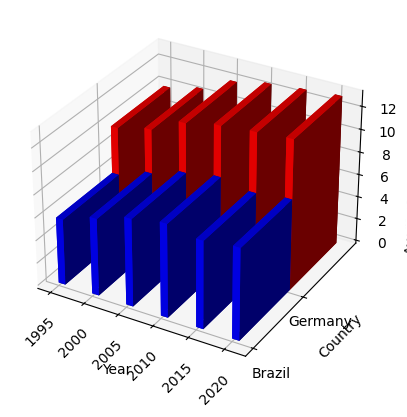

In [14]:
# CRiar um gráfico de barras 3D comparando o desempenho de 
# 'Germany' e 'Brazil' ao longo dos anos, com base no df
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# criar um array com os anos
anos = np.array(df.columns)
# criar um array com os índices dos países
select = ['Brazil', 'Germany']
paises = np.arange(len(select))
# criar um array com os valores de escolaridade
valores = df.loc[select].values
# criar um array com a altura das barras
altura = np.zeros_like(valores)
# criar um array com a largura das barras
largura = np.ones_like(valores)
# criar um array com a profundidade das barras
profundidade = np.ones_like(valores)
# criar um array com as cores das barras
cores = ['b', 'r']
# criar as barras
for i in range(len(paises)):
    ax.bar3d(anos, paises[i], altura[i], largura[i], profundidade[i], valores[i], color=cores[i])
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=45)
ax.set_yticks(paises)
ax.set_yticklabels(select)
ax.set_xlabel('Year')
ax.set_ylabel('Country')
ax.set_zlabel('Average years of schooling')
plt.show();




Observe também como a visualização tridimensional distorce os dados. Essa distorção ocorre porque a terceira dimensão desnecessária requer a adição de perspectiva ao gráfico. Simplificar o gráfico descartando esses elementos estranhos e distrativos e mostrando os dados torna seu argumento claro e compreensível.

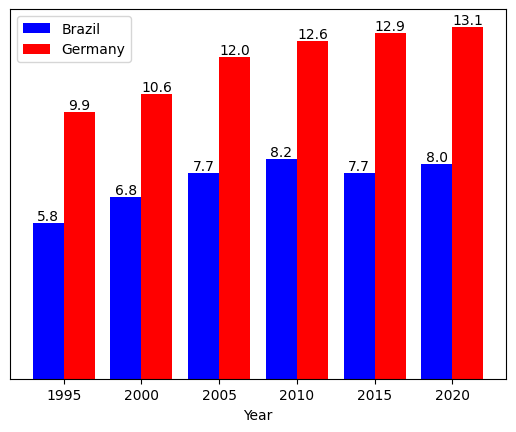

In [29]:
# Vamos fazer o mesmo gráfico mas agora como um gráfico de 
# barras bidimensional colocando lado a lado as barras dos 
# países, de forma que possam ser comparados. Acrescentar 
# no topo de cada barra o valor correspondentes. Colocar
# a legenda com o nom dos países na parte superior do gráfico
fig, ax = plt.subplots()
# criar um array com os anos
anos = np.array(df.columns)
# criar um array com os índices dos países
select = ['Brazil', 'Germany']
paises = np.arange(len(select))
# criar um array com os valores de escolaridade
valores = df.loc[select].values
# criar um array com as cores das barras
cores = ['b', 'r']
# criar as barras
for i in range(len(paises)):
    ax.bar(anos + 2.0 * i, valores[i], 2.0, color=cores[i], label=select[i])
    for j in range(len(anos)):
        ax.text(anos[j] + 2.0 * i, valores[i, j], f'{valores[i, j]:.1f}', ha='center', va='bottom')
ax.set_xticks(anos + 1.0)
ax.set_xticklabels(anos)
ax.set_xlabel('Year')
ax.set_ylabel('Average years of schooling')
ax.legend(loc='upper left')
#tirar o eixo y
ax.get_yaxis().set_visible(False)
plt.show();


Embora grande parte da nossa compreensão da percepção e de como nossos olhos e cérebros funcionam esteja enraizada na pesquisa científica, nossas decisões sobre qual gráfico usar, onde colocamos rótulos e anotações, quais cores e fontes usar e como apresentamos nossas visualizações são, em sua maioria, subjetivas. Há casos em que certos gráficos estão errados, mas muitos outros casos exigem nada mais do que seu melhor julgamento. À medida que você cria mais visualizações e lê mais gráficos, você desenvolverá seu próprio olho e estética — e seu próprio equilíbrio entre arte e ciência.